In [1]:
# Local
%cd ..
%cd src
import stm_trusssystem as TS
from stm_methods import *
# Global
import numpy as np
import math
import matplotlib.pyplot as plt

/Users/karinyu/Documents/GitHub/StrutandTieModelling
/Users/karinyu/Documents/GitHub/StrutandTieModelling/src


# Example of a simply supported beam
## Problem definition and simple 3-bar truss

In [2]:
# Define parameters
# Geometry is wall of 10m length and 4m height, and 0.2 m thickness
L = 10000 # mm
h = 4000 # mm
thickness = 200 #mm
cnomd = 30+10. # mm
# Reinforcement material
Es = 205000 # MPa
fsy = 435 # MPa
eps_sy = fsy/Es
ds = 1
# Concrete material
Ec = 30000 # MPa
fck = 20 # MPa, fcd
eps_c = 0.003
dc = -1
# Load
F = 1000000 # N

Make sure that the first material is concrete and the second for steel.


/Users/karinyu/Documents/GitHub/StrutandTieModelling/src/stm_trusssystem.py:134: RuntimeWarning: invalid value encountered in scalar divide
  self.ux = (L.end.x-L.start.x)/L.length
/Users/karinyu/Documents/GitHub/StrutandTieModelling/src/stm_trusssystem.py:135: RuntimeWarning: invalid value encountered in scalar divide
  self.uy = (L.end.y-L.start.y)/L.length
/Users/karinyu/Documents/GitHub/StrutandTieModelling/src/stm_trusssystem.py:136: RuntimeWarning: invalid value encountered in scalar divide
  self.uz = (L.end.z-L.start.z)/L.length


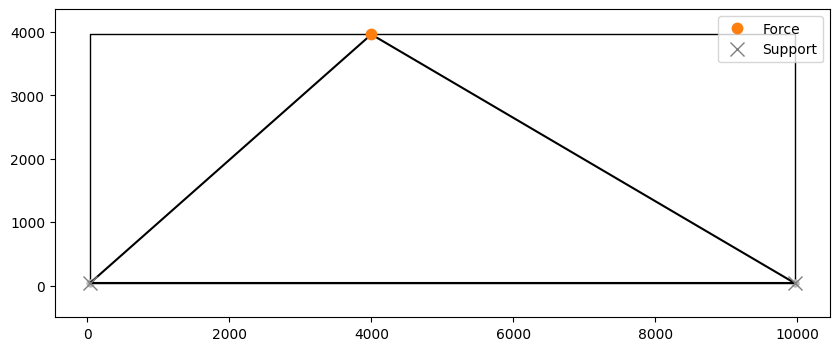

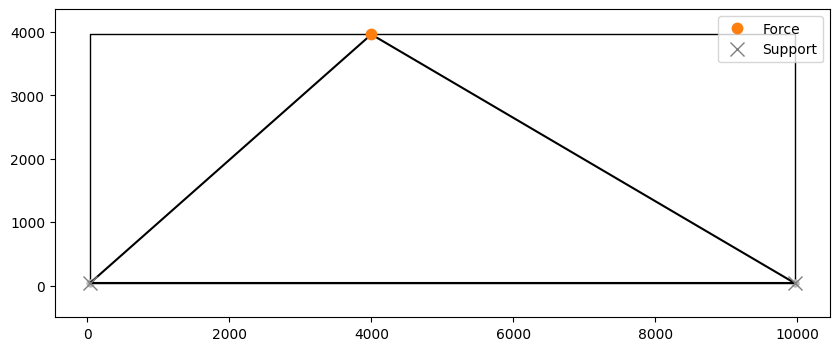

In [3]:
# Define points
# Generate Points
P1 = TS.Point(x = cnomd, y = cnomd, z = 0) 
P2 = TS.Point(x = L-cnomd, y = cnomd, z = 0)
P3 = TS.Point(x = L-cnomd, y = h-cnomd, z = 0)
P4 = TS.Point(x = cnomd, y = h-cnomd, z = 0)
# Load Introduction
P5 = TS.Point(x = 0.4*L, y = h-cnomd, z = 0)
# Add. Nodes
P6 = TS.Point(x = 0.7*L, y = cnomd,z = 0)
P7 = TS.Point(x = 0.7*L, y = h-cnomd,z = 0)
# Material
matT = TS.Material(Es,fsy,eps_sy,ds)
matC = TS.Material(Ec,fck,eps_c,dc)
DOF0 = TS.DOF(0,0,0,0,0,0)
# Generate Nodes
N1 = TS.Node(P1,DOF0)
N2 = TS.Node(P2,DOF0)
N3 = TS.Node(P3,DOF0)
N4 = TS.Node(P4,DOF0)
N5 = TS.Node(P5,DOF0)
N6 = TS.Node(P6,DOF0)
N7 = TS.Node(P7,DOF0)
S1 = TS.Support(N1, TS.DOF(1,1,1,0,0,0)) # fixed support 
S2 = TS.Support(N2, TS.DOF(0,1,0,0,0,0)) # roller support
# Polygon, in clockwise direction, assumed to be in one plane
Polygon = TS.Polygon()
Polygon.addPoint([P1, P4, P3, P2])
Truss = TS.TrussSystem()
# Search Space - CLOCKWISE
Truss.addPolygontoSS(Polygon)
# add Nodes
Truss.addNode([N1, N2, N5])
# add Edges
e1 = TS.Edge(N1, N5, matC)
e2 = TS.Edge(N5, N2, matC)
e3 = TS.Edge(N2, N1, matT)
Truss.addMaterial(matC) # first material is assumed to be concrete
Truss.addMaterial(matT) # second material is assumed to be steel
Truss.addEdge([e1,e2,e3])
# add Force
Force1 = TS.Force_ext(N5, [0,-1*F,0,0,0,0], direc_Force = TS.DOF(0,1,0,0,0,0))
Truss.addForce(Force1)
# add Supports
Truss.addSupport(S1)
Truss.addSupport(S2)
# plot truss without solving the system yet
Truss.plotSTM(fig_size=(10,4))
# orange dots indicate locations of acting forces
# grey dots indicate restrained nodes

In [4]:
# solve the system
Truss.solveTruss(update=True) # updates the area and forces
# check equilibrium
print('Is strut-and-tie model in equilibrium? ', Truss.checkEquilibrium())

Is strut-and-tie model in equilibrium?  True


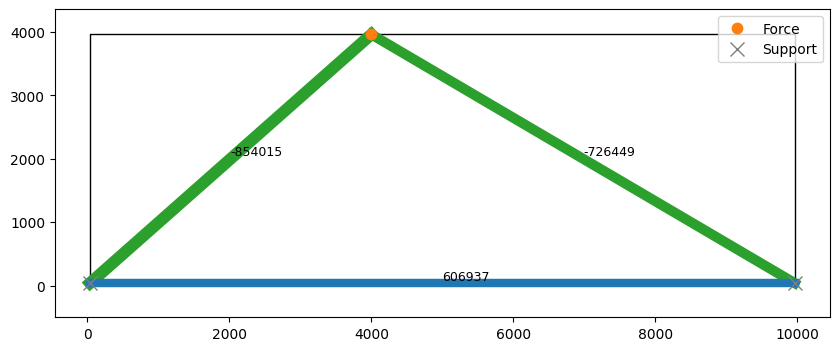

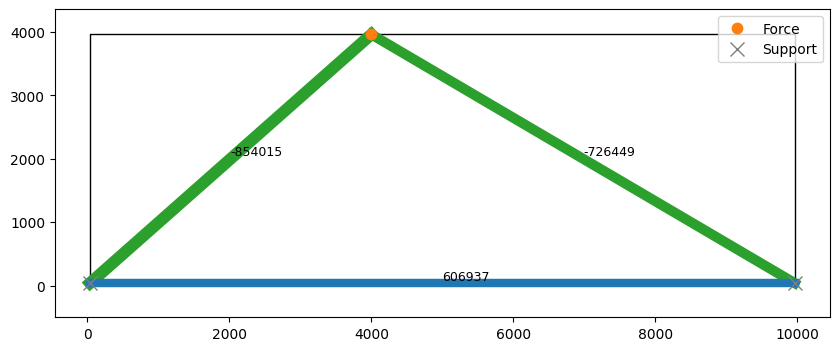

In [5]:
Truss.plotSTM(fig_size=(10,4), without_forces=False, plot_scale=1e5, label_edges = True) # to include the force labels in the selected unit add label_edges = True

## 7-bar truss

In [6]:
# Modify truss and add two additional nodes
Truss.removeEdge(e2)
Truss.removeEdge(e3)
# add new nodes
Truss.addNode([N6, N7])
Truss.addEdge([TS.Edge(N5, N6, matT)])
Truss.addEdge([TS.Edge(N5, N7, matC)])
Truss.addEdge([TS.Edge(N7, N6, matT)])
Truss.addEdge([TS.Edge(N7, N2, matC)])
Truss.addEdge([TS.Edge(N2, N6, matC)])
Truss.addEdge([TS.Edge(N6, N1, matT)])
Truss.solveTruss(update = True)

In [7]:
print('Is strut-and-tie model in equilibrium? ', Truss.checkEquilibrium())

Is strut-and-tie model in equilibrium?  True


The maximum hydrostatic stress is assumed as :  20

current node: [40.0, 40.0, 0]
Hydrostatic nodal zones are assumed.

current node: [9960.0, 40.0, 0]
Hydrostatic nodal zones are assumed.

current node: [4000.0, 3960.0, 0]
Hydrostatic nodal zones are assumed.

current node: [7000.0, 40.0, 0]
Hydrostatic nodal zones are assumed.

current node: [7000.0, 3960.0, 0]
Hydrostatic nodal zones are assumed.


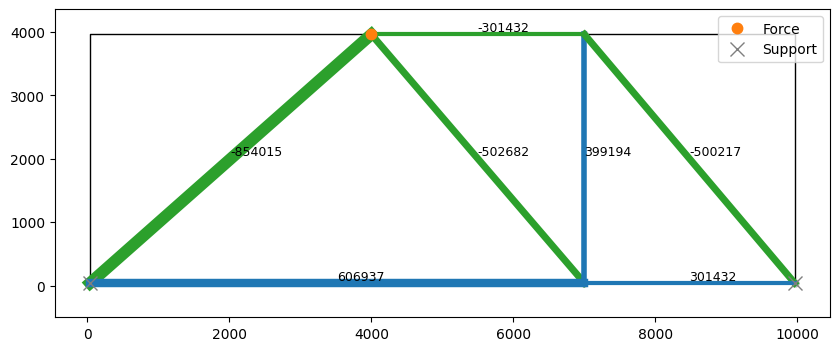

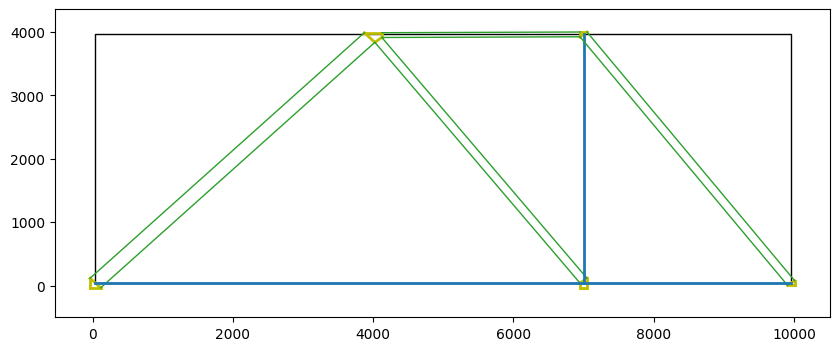

In [8]:
Truss.plotSTM(fig_size=(10,4), plot_scale=1e5, label_edges = True)
# obtain stress fields
Truss.plotStressField(fig_size=(10,4), t = thickness)

The maximum hydrostatic stress is assumed as :  20

current node: [40.0, 40.0, 0]
Hydrostatic nodal zones are assumed.
Discontinuity point p:  [-35.10080645161298, 115.86714121132337, 0]  is not inside the geometry.
Discontinuity point p:  [-35.100806451612996, -35.86714121132337, 0]  is not inside the geometry.
Discontinuity point p:  [115.100806451613, -35.86714121132336, 0]  is not inside the geometry.

current node: [9960.0, 40.0, 0]
Hydrostatic nodal zones are assumed.
Discontinuity point p:  [10009.899193548386, 2.321017116523933, 0]  is not inside the geometry.
Discontinuity point p:  [10009.899193548386, 77.67898288347607, 0]  is not inside the geometry.

current node: [4000.0, 3960.0, 0]
Hydrostatic nodal zones are assumed.

current node: [7000.0, 40.0, 0]
Hydrostatic nodal zones are assumed.
Discontinuity point p:  [6950.100806451613, -35.867141211323315, 0]  is not inside the geometry.
Discontinuity point p:  [7049.899193548387, -35.86714121132337, 0]  is not inside the geom

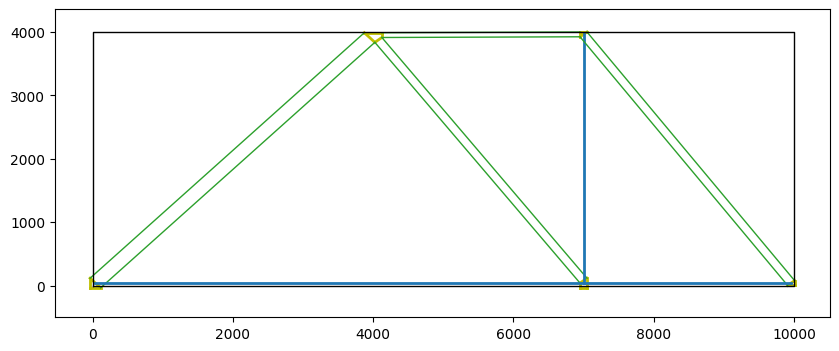

In [9]:
# Check geometry fulfilled for nodal zone:
# Define geometry = polygon_interiour
G1 = TS.Point(x = 0, y = 0, z = 0) 
G2 = TS.Point(x = L, y = 0, z = 0)
G3 = TS.Point(x = L, y = h, z = 0)
G4 = TS.Point(x = 0, y = h, z = 0)
polygon_interiour = TS.Polygon()
polygon_interiour.addPoint([G1, G4, G3, G2])
Truss.plotStressField(fig_size=(10,4), t = thickness, polygon_in = [polygon_interiour], check_disc_points = True)
# There are multiple points outside of the geometry --> move truss inside the geometry

## modify 7-bar truss's nodal locations
the lower nodes are not inside the wall

In [10]:
# check which node needs to be modified:
for n in Truss.NodeList:
    print(n.point.printPoint())

[40.0, 40.0, 0]
[9960.0, 40.0, 0]
[4000.0, 3960.0, 0]
[7000.0, 40.0, 0]
[7000.0, 3960.0, 0]


In [11]:
# Modify nodal locations
Truss.NodeList[0].point.changePoint(2*cnomd, 2*cnomd, None) # only change x location, others remain the same
Truss.NodeList[1].point.changePoint(L-2*cnomd, 2*cnomd, None) # only change x location, others remain the same
Truss.NodeList[3].point.changePoint(None, 2*cnomd, None) # only change x location, others remain the same
# achieves the same
#P5_new = TS.Point(x = 0.4*L, y = h, z = 0)
#Truss.changeNodePosition(P5, P5_new)
Truss.solveTruss(update = True)

Is strut-and-tie model in equilibrium?  True


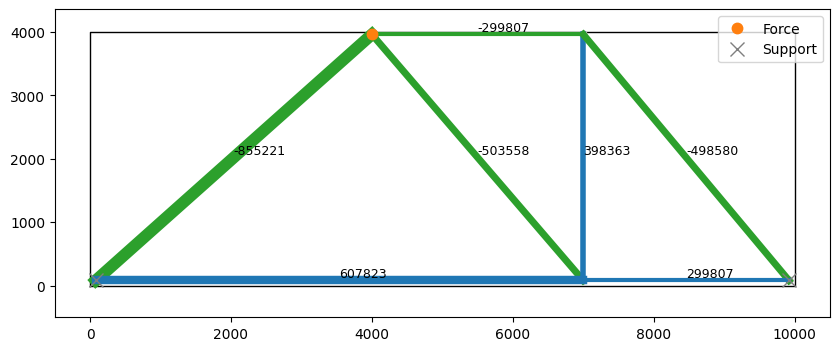

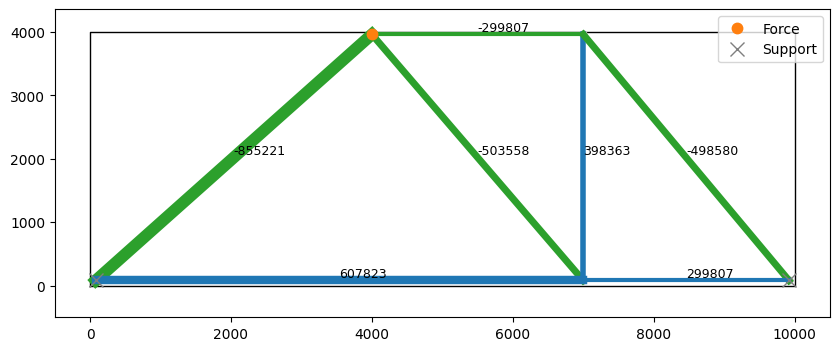

In [16]:
print('Is strut-and-tie model in equilibrium? ', Truss.checkEquilibrium())
Truss.plotSTM(fig_size = (10,4), plot_scale=1e5, label_edges = True, polygon_in=[polygon_interiour])

The maximum hydrostatic stress is assumed as :  20

current node: [80.0, 80.0, 0]
Hydrostatic nodal zones are assumed.

current node: [9920.0, 80.0, 0]
Hydrostatic nodal zones are assumed.

current node: [4000.0, 3960.0, 0]
Hydrostatic nodal zones are assumed.

current node: [7000.0, 80.0, 0]
Hydrostatic nodal zones are assumed.

current node: [7000.0, 3960.0, 0]
Hydrostatic nodal zones are assumed.


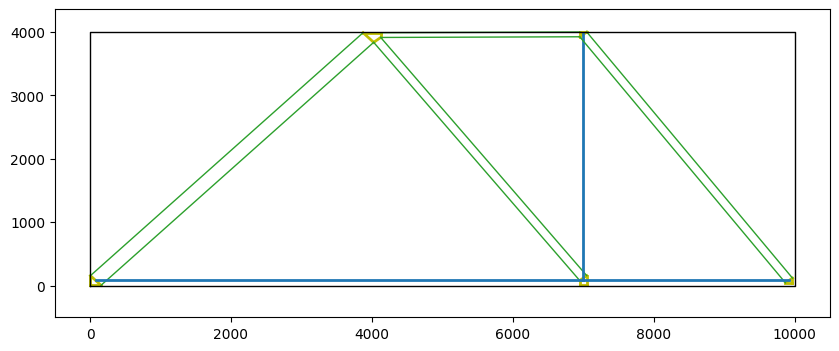

In [17]:
# obtain stress fields
Truss.plotStressField(fig_size=(10,4), t = thickness, tol = 15, polygon_in = [polygon_interiour], check_disc_points = True)